## Importing Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
%%time
file_path = 'data/iphone_purchase.csv'
data = pd.read_csv(file_path)
data.head()

CPU times: total: 0 ns
Wall time: 9.07 ms


,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
%%time
df = data.copy()
df.head()

CPU times: total: 0 ns
Wall time: 1 ms


,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## EDA and Data Preprocessing

In [4]:
%%time
print("The dimension of the DataFrame is,")
df.shape

The dimension of the DataFrame is,
CPU times: total: 0 ns
Wall time: 0 ns


(400, 4)

In [5]:
%%time
# Printing the summary of the DataFrame's structure and content.
print("Summary of the DataFrame's structure and content-------")
df.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
CPU times: total: 0 ns
Wall time: 3.93 ms


In [6]:
%%time
df.describe()

CPU times: total: 0 ns
Wall time: 4.59 ms


,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
%%time
df.select_dtypes(include='number').corr()

CPU times: total: 0 ns
Wall time: 0 ns


,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


In [9]:
%%time
print("The skewness of the dataset is as follows - ")
print(df.select_dtypes(include='number').skew())

The skewness of the dataset is as follows - 
Age                0.231337
Salary             0.495024
Purchase Iphone    0.596903
dtype: float64
CPU times: total: 0 ns
Wall time: 2.52 ms


In [10]:
print("Checking for null values.")
df.isnull().sum()

Checking for null values.


Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

## Checking for duplicates

In [11]:
%%time
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool
CPU times: total: 0 ns
Wall time: 1.61 ms


In [12]:
%%time
# Show only the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

     Gender  Age  Salary  Purchase Iphone
74     Male   32   18000                0
94   Female   29   83000                0
186  Female   20   82000                0
192    Male   29   43000                0
231    Male   39   42000                0
236    Male   40   57000                0
256  Female   41   72000                0
257    Male   40   57000                0
312  Female   38   50000                0
322    Male   41   52000                0
332    Male   42   65000                0
341    Male   35   75000                0
349    Male   38   61000                0
357  Female   41   72000                0
359    Male   42   54000                0
368    Male   38   71000                0
374  Female   37   80000                0
383    Male   49   28000                1
390    Male   48   33000                1
393    Male   60   42000                1
CPU times: total: 0 ns
Wall time: 2.51 ms


## Graphical Representation of data

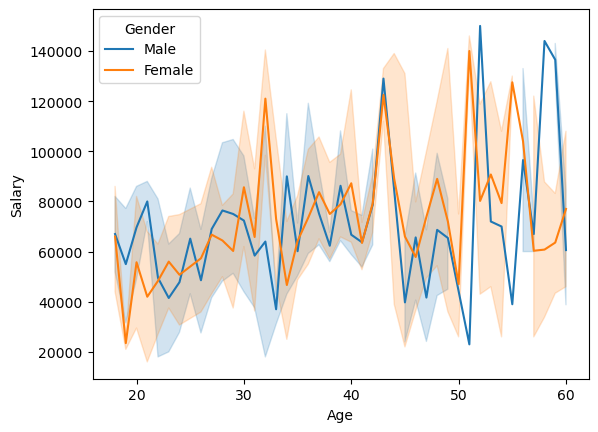

In [13]:
sns.lineplot(x='Age', y='Salary', hue='Gender', data=df)
plt.savefig('lineplot.png')
plt.show()

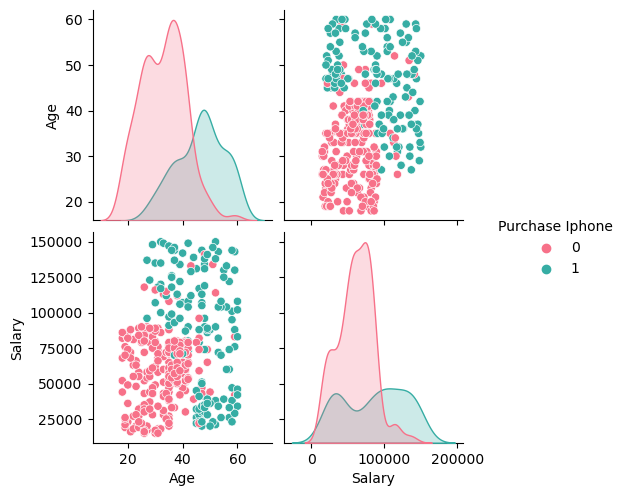

In [14]:
sns.pairplot(data, hue='Purchase Iphone', vars=['Age', 'Salary'], palette='husl')
plt.savefig("pair plot.png")
plt.show()

In [25]:
## Interference - People with higher age and salary tend to purchase more than that of young people.

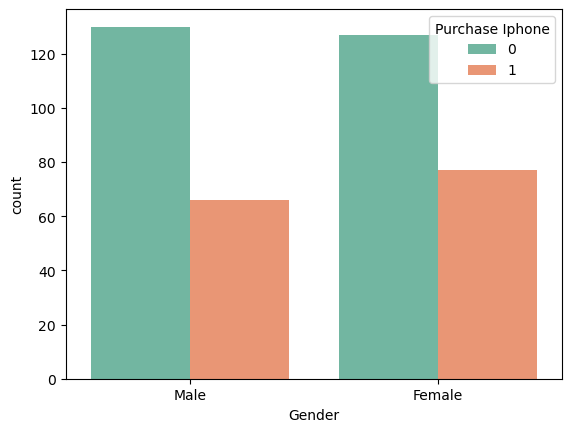

In [15]:
sns.countplot(x='Gender', hue='Purchase Iphone', data=data, palette='Set2')
plt.savefig("gender countplot.png")
plt.show()

In [24]:
## Interference - The count plot shows that the purchase made by female is slightly higher than male.

## Insights

In [16]:
## Total number of male
male_count = sum(df['Gender'] == "Male")
print("Total number of male are ",male_count,'.')

Total number of male are  196 .


In [17]:
## Total number of female
female_count = sum(df['Gender'] == "Female")
print("Total number of female are ",female_count,'.')

Total number of female are  204 .


In [18]:
## Number of male who purchased
male_count_purchase = sum((df['Gender']=='Male') & (df['Purchase Iphone'] ==1))
print("Number of male who purchased an iphone are",male_count_purchase,'.')

Number of male who purchased an iphone are 66 .


In [19]:
## Number of female who purchased
female_count_purchase = sum((df['Gender']=='Female') & (df['Purchase Iphone'] ==1))
print("Number of female who purchased an iphone are",female_count_purchase,'.')

Number of female who purchased an iphone are 77 .


## Preparing data for training

In [20]:
dummy = pd.get_dummies(df['Gender']).astype('int')
df1 = pd.concat([df,dummy], axis=1)
df1.head()

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1


In [21]:
df1.shape

(400, 6)

## Saving the new DataFrame

In [23]:
csv_file_path = 'data/iphone_purchase_cleaned.csv'
df1.to_csv(csv_file_path, index=False)